In [1]:
import sys
sys.executable

'C:\\Users\\HP\\.virtualenvs\\data-science-kLkPvyWw\\Scripts\\python.exe'

# Exploring One - Dimensional Data

In [2]:
from typing import List, Dict, Callable
from collections import Counter
import math
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def bucketize(point: float, bucket_size: float) -> float:
    """floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)

In [4]:
def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
    """buckets the points and counts how many in each buckets"""
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points: List[float], bucket_size: float, title: str = ""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width = bucket_size)
    plt.title(title)
    # plt.axis('off')
    plt.show()


In [5]:
import random
import statistics

Normal = statistics.NormalDist()

In [6]:
random.seed(0)
uniform = [200 * random.random() - 100 for _ in range(10000)]
normal = [57 * Normal.inv_cdf(random.random()) for _ in range(10000)]

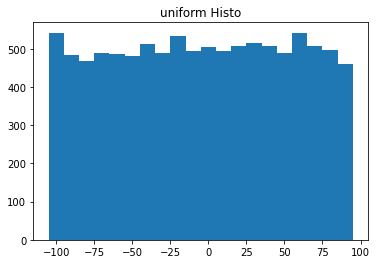

In [7]:
plot_histogram(uniform, 10, "uniform Histo")

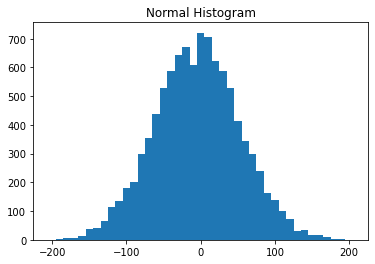

In [8]:
plot_histogram(normal, 10, "Normal Histogram")

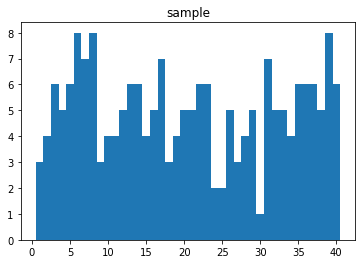

In [9]:

random.seed(0)
points = [random.randint(1,40) for _ in range(200)]
plot_histogram(points=points, bucket_size=1, title='sample')

# Two Dimensions

In [10]:
def random_normal() -> float:
    '''returns a random draw from a standard normal distribution'''
    return Normal.inv_cdf(random.random())

In [11]:
xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

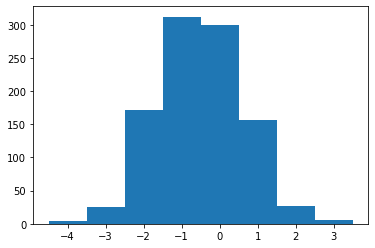

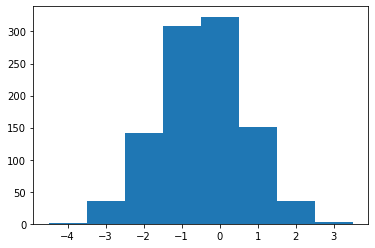

In [12]:
plot_histogram(points=ys1, bucket_size=1)
plot_histogram(points=ys2, bucket_size=1)

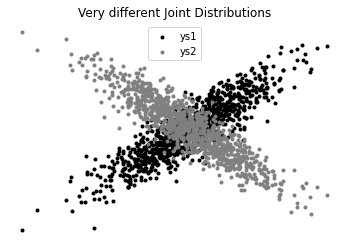

In [13]:
plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very different Joint Distributions")
plt.axis('off')
plt.show()

In [14]:
print('Correlation between xs and ys1')
print(np.cov(xs, ys1))
print()
print('Correlation between xs and ys2')
print(np.cov(xs, ys2))

Correlation between xs and ys1
[[0.99986949 0.98990693]
 [0.98990693 1.23535383]]

Correlation between xs and ys2
[[ 0.99986949 -1.00455436]
 [-1.00455436  1.23864337]]


# Many dimentions

In [15]:
Vector = List[float]
Matrix = List[List[float]]
def make_matrix(num_rows: int,
                num_cols: int,
                entry_fn: Callable[[int, int], float]) -> Matrix:
    return [[entry_fn(i, j)
            for j in range(num_cols)]
            for i in range(num_rows)]

In [16]:
from stati import correlation

In [17]:
def correlation_matrix(data: List[Vector]) -> Matrix:
    def correlation_ij(i: int, j: int) -> float:
        return correlation(data[i], data[j])
    return make_matrix(len(data), len(data), correlation_ij)

In [18]:
vectors = [xs, ys1, ys2]
num_vectors = len(vectors)
correlation_matrix(vectors)

[[0.9999999999999999, 0.8906909159653447, -0.9026692416294676],
 [0.8906909159653447, 1.0000000000000002, -0.8053664165853998],
 [-0.9026692416294676, -0.8053664165853998, 1.0000000000000002]]

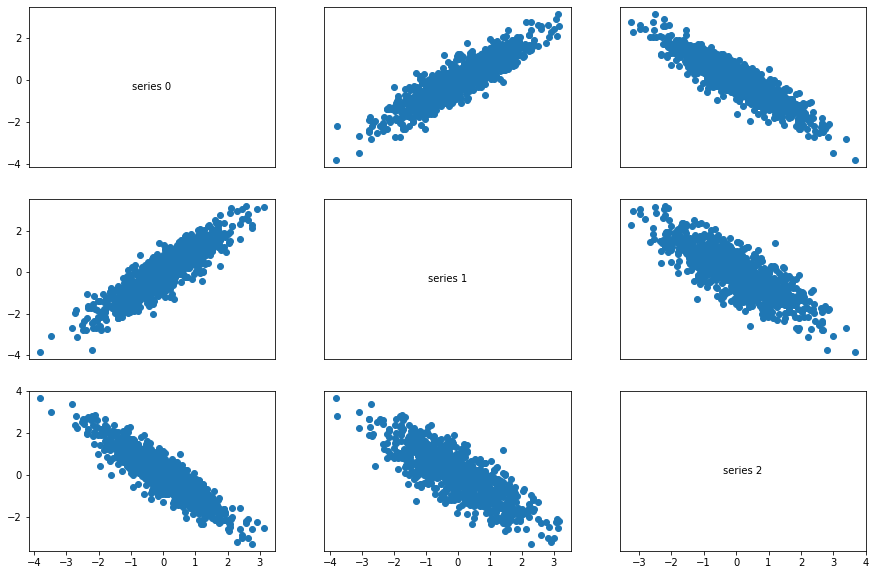

In [19]:
fig, ax = plt.subplots(num_vectors, num_vectors)
fig.set_size_inches(15,10)
for i in range(num_vectors):
    for j in range(num_vectors):
        if i != j: ax[i][j].scatter(vectors[j], vectors[i])
        else: ax[i][j].annotate("series " + str(i), (0.5, 0.5),
                        xycoords="axes fraction",
                        ha="center",
                        va="center")
        if i <num_vectors -1:
            ax[i][j].xaxis.set_visible(False)
        if j > 0: 
            ax[i][j].yaxis.set_visible(False)
            ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
            ax[0][0].set_ylim(ax[0][1].get_ylim())
    

# Using Named Tuples

In [20]:
import datetime

stock_prince = {'closing_price': 102.05,
                'date': datetime.date(2014,8,29),
                'symbol': 'AAPL'}

In [21]:
stock_prince['closing_price']

102.05

In [22]:
price: Dict[datetime.date, float] = {}

In [23]:
from collections import namedtuple

In [24]:
StockPrice = namedtuple('StockPrice', ['symbol', 'date','closing_price'])
pricing = StockPrice('MSFT', datetime.date(2018, 12, 14), 105.02)

In [25]:
from typing import NamedTuple

class StockPrice(NamedTuple):
    symbol: str
    date: datetime.date
    closing_price: float

    def is_high_tech(self) -> bool:
        '''its a class, so we can add methods too'''
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL'] 

In [26]:
price = StockPrice('MSFT', datetime.date(2018, 12, 14), 103.2)

In [27]:
print(price.symbol)
print(price.date)
print(price.closing_price)
print(price.is_high_tech())

MSFT
2018-12-14
103.2
True


# Dataclasses

In [28]:
from dataclasses import dataclass

In [29]:
@dataclass
class StockPrice2:
    symbol: str
    date: datetime.date
    closing_price: float

    def is_high_tech(self) -> bool:
        '''its a class, so we can add methods too'''
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']

In [30]:
price2 = StockPrice2("MSFT", datetime.date(2018, 12, 14), 106.6)

In [31]:
assert price2.symbol == "MSFT"
assert price2.is_high_tech()
assert price2.closing_price

# Cleaning and Munging

In [32]:
from dateutil.parser import parse
from pprint import pprint

In [33]:
def parse_row(row: List[str]) -> StockPrice:
    symbol, date, closing_price = row
    return StockPrice(
                    symbol=symbol,
                    date=parse(date).date(),
                    closing_price=float(closing_price))

In [34]:
stock = parse_row(["MSFT", "2018-12-14", "106.03"])
stock

StockPrice(symbol='MSFT', date=datetime.date(2018, 12, 14), closing_price=106.03)

In [35]:
assert stock.symbol == "MSFT"
assert stock.date == datetime.date(2018, 12, 14)
assert stock.closing_price == 106.03

In [36]:
"""avoiding bad data"""
from typing import Optional
import re


In [37]:
def try_parse_row(row: List[str]) -> Optional[StockPrice]:
    symbol, date_, closing_price_ = row
    if not re.match(r"^[A-Z]+$", symbol):
        return None
    
    try:
        date = parse(date_).date()
    except ValueError:
        return None

    try:
        closing_price = float(closing_price_)
    except ValueError:
        return None
        
    return StockPrice(symbol, date, closing_price)

In [38]:
assert try_parse_row(['MSFT0', '2018-12-12', '1024.23']) is None
assert try_parse_row(['MSFT', '2018-12-15', '1024.23']) is not None
#This will true
assert try_parse_row(['MSFT', '2018-12-14', '1029'])

In [39]:
import csv
data: List[StockPrice] = []

with open("testing.csv") as f:
    reader = csv.reader(f)
    for row in reader:
        data_load = try_parse_row(row)
        if data_load:
            data.append(data_load)
        else:
            print(f"skipping invalid row: {row}")

In [40]:
data

[StockPrice(symbol='GOOG', date=datetime.date(2015, 4, 2), closing_price=32.2),
 StockPrice(symbol='MSFT', date=datetime.date(2020, 11, 12), closing_price=12.12),
 StockPrice(symbol='AMZN', date=datetime.date(2012, 12, 12), closing_price=3.2),
 StockPrice(symbol='APPL', date=datetime.date(2012, 12, 2), closing_price=2.23),
 StockPrice(symbol='APPL', date=datetime.date(2001, 12, 3), closing_price=23.2),
 StockPrice(symbol='APPL', date=datetime.date(2010, 1, 2), closing_price=5.5),
 StockPrice(symbol='MSFT', date=datetime.date(2018, 2, 2), closing_price=42.3),
 StockPrice(symbol='AMZN', date=datetime.date(2012, 3, 23), closing_price=50.21),
 StockPrice(symbol='AMZN', date=datetime.date(2017, 5, 23), closing_price=21.12)]

# Manipulating Data

In [41]:
max_apple_price = max(StockPrice.closing_price
                    for StockPrice in data
                    if StockPrice.symbol == 'APPL')
print(max_apple_price)

23.2


In [42]:
from collections import defaultdict
max_prices: Dict[str, float] = defaultdict(lambda: float('-inf'))

In [43]:
for sp in data:
    symbol, closing_price = sp.symbol, sp.closing_price
    if closing_price > max_prices[symbol]:
        max_prices[symbol] = closing_price

In [44]:
print(max_prices)

defaultdict(<function <lambda> at 0x0F152610>, {'GOOG': 32.2, 'MSFT': 42.3, 'AMZN': 50.21, 'APPL': 23.2})


In [45]:
prices: Dict[str, List[StockPrice]] = defaultdict(list)

In [46]:
for sp in data:
    prices[sp.symbol].append(sp)
pprint(prices)

defaultdict(<class 'list'>,
            {'AMZN': [StockPrice(symbol='AMZN', date=datetime.date(2012, 12, 12), closing_price=3.2),
                      StockPrice(symbol='AMZN', date=datetime.date(2012, 3, 23), closing_price=50.21),
                      StockPrice(symbol='AMZN', date=datetime.date(2017, 5, 23), closing_price=21.12)],
             'APPL': [StockPrice(symbol='APPL', date=datetime.date(2012, 12, 2), closing_price=2.23),
                      StockPrice(symbol='APPL', date=datetime.date(2001, 12, 3), closing_price=23.2),
                      StockPrice(symbol='APPL', date=datetime.date(2010, 1, 2), closing_price=5.5)],
             'GOOG': [StockPrice(symbol='GOOG', date=datetime.date(2015, 4, 2), closing_price=32.2)],
             'MSFT': [StockPrice(symbol='MSFT', date=datetime.date(2020, 11, 12), closing_price=12.12),
                      StockPrice(symbol='MSFT', date=datetime.date(2018, 2, 2), closing_price=42.3)]})


In [47]:
prices = {symbol: sorted(symbol_prices)
            for symbol, symbol_prices in prices.items()}

In [48]:
pprint(prices)

{'AMZN': [StockPrice(symbol='AMZN', date=datetime.date(2012, 3, 23), closing_price=50.21),
          StockPrice(symbol='AMZN', date=datetime.date(2012, 12, 12), closing_price=3.2),
          StockPrice(symbol='AMZN', date=datetime.date(2017, 5, 23), closing_price=21.12)],
 'APPL': [StockPrice(symbol='APPL', date=datetime.date(2001, 12, 3), closing_price=23.2),
          StockPrice(symbol='APPL', date=datetime.date(2010, 1, 2), closing_price=5.5),
          StockPrice(symbol='APPL', date=datetime.date(2012, 12, 2), closing_price=2.23)],
 'GOOG': [StockPrice(symbol='GOOG', date=datetime.date(2015, 4, 2), closing_price=32.2)],
 'MSFT': [StockPrice(symbol='MSFT', date=datetime.date(2018, 2, 2), closing_price=42.3),
          StockPrice(symbol='MSFT', date=datetime.date(2020, 11, 12), closing_price=12.12)]}


In [49]:
def percentage_change(yesterday: StockPrice, today: StockPrice) -> float:
    return today.closing_price / yesterday.closing_price - 1

In [50]:
class DailyChange(NamedTuple):
    symbol: str
    date: datetime.date
    percentage_change: float

In [51]:
def day_over_day_changes(prices: List[StockPrice]) -> List[DailyChange]:
    
    return [DailyChange(symbol=today.symbol, date=today.date,
            percentage_change=percentage_change(yesterday, today))
            for yesterday, today in zip(prices, prices[1:])]

In [52]:
all_changes = [change
                for symbol_prices in prices.values()
                for change in day_over_day_changes(symbol_prices)]

In [53]:
max_change = max(all_changes, key=lambda change: change.percentage_change)

In [54]:
print(max_change.symbol)
print(max_change.date)
print(max_change.percentage_change)

AMZN
2017-05-23
5.6


In [55]:
min_change = min(all_changes, key=lambda change: change.percentage_change)

print(min_change.symbol)
print(min_change.date)
print(min_change.percentage_change)

AMZN
2012-12-12
-0.9362676757618005


In [56]:
changes_by_month: List[DailyChange] = {month: [] for month in range(1,13)}


In [57]:
for change in all_changes:
    changes_by_month[change.date.month].append(change)

In [60]:
changes_by_month

{1: [DailyChange(symbol='APPL', date=datetime.date(2010, 1, 2), percentage_change=-0.7629310344827587)],
 2: [],
 3: [],
 4: [],
 5: [DailyChange(symbol='AMZN', date=datetime.date(2017, 5, 23), percentage_change=5.6)],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [DailyChange(symbol='MSFT', date=datetime.date(2020, 11, 12), percentage_change=-0.7134751773049646)],
 12: [DailyChange(symbol='AMZN', date=datetime.date(2012, 12, 12), percentage_change=-0.9362676757618005),
  DailyChange(symbol='APPL', date=datetime.date(2012, 12, 2), percentage_change=-0.5945454545454545)]}

# Rescaling

In [1]:
from linearalgebra import distance

In [2]:
a_to_b = distance([63,150],[67,160])
a_to_c = distance([63, 150],[70, 171])
b_to_c = distance([67, 160], [70, 171])
print(a_to_b)
print(a_to_c)
print(b_to_c)

10.770329614269007
22.135943621178654
11.40175425099138


In [3]:
a_to_b = distance([160, 150],[170.2,160])
a_to_c = distance([160, 150], [177.8, 171])
b_to_c = distance([170.2, 160], [177.8, 171])
print(a_to_b)
print(a_to_c)
print(b_to_c)

14.284257068535268
27.52889391167034
13.370115930686627


In [8]:
from typing import Tuple, List
from linearalgebra import vector_mean,Vector
from stati import standard_deviation

In [21]:
def scale(data: List[Vector]) -> Tuple[Vector, Vector]:
    '''returns the mean and standard deviation for each position'''
    dim = len(data[0])
    means = vector_mean(data)
    stdevs = [standard_deviation([vector[i] for vector in data]) for i in range(dim)]
    return means, stdevs

In [11]:
vectors = [[-3,-1,1], [-1,0,1],[1,1,1]]

In [23]:
means, stdevs = scale(vectors)

In [24]:
print('mean is', means)
print('stdevs is', stdevs)

mean is [-1.0, 0.0, 1.0]
stdevs is [2.0, 1.0, 0.0]


In [37]:
def rescale(data: List[Vector]) -> List[Vector]:
    '''rescales the input data so that each positions has mean 0 and standard deviation 1.(leaves a position as is if its std is 0)'''
    dim = len(data[0])
    means, stdevs = scale(data)
    rescaled = [v[:] for v in data]#making a copy of each vector
    for v in rescaled:
        # print('v is ', v)
        for i in range(dim):
            # print('printing i', i)
            if stdevs[i] > 0:
                # print('stdv is greater than 0 so.')
                v[i] = (v[i] - means[i]) / stdevs[i]
                # print(f'printing {v[i]}')
    return rescaled
        

In [39]:
means, std = scale(rescale(vectors))
assert means == [0,0,1]
assert std == [1,1,0]

# An Aside : tqdm

In [1]:
import tqdm 
import random

In [2]:
for i in tqdm.tqdm(range(100)):
    _ = [random.random() for _ in range(1000000)]

100%|██████████| 100/100 [00:39<00:00,  2.52it/s]


In [3]:
for i in tqdm.trange(200):
    _ = [random.random() for _ in range(300000)]

100%|██████████| 200/200 [00:23<00:00,  8.43it/s]


In [5]:
from typing import List

def primes_up_to(n: int) -> List[int]:
    primes = [2]
    with tqdm.trange(3, n) as t:
        for i in t:
            i_is_prime = not any(i % p == 0 for p in primes)
            if i_is_prime:
                primes.append(i)
            t.set_description(f"{len(primes)} primes")
    return primes

In [8]:
my_primes = primes_up_to(1000)

168 primes: 100%|██████████| 997/997 [00:02<00:00, 459.90it/s]
